In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("house_prices.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
sum(data.isnull().sum())

33

### Feature Transformation

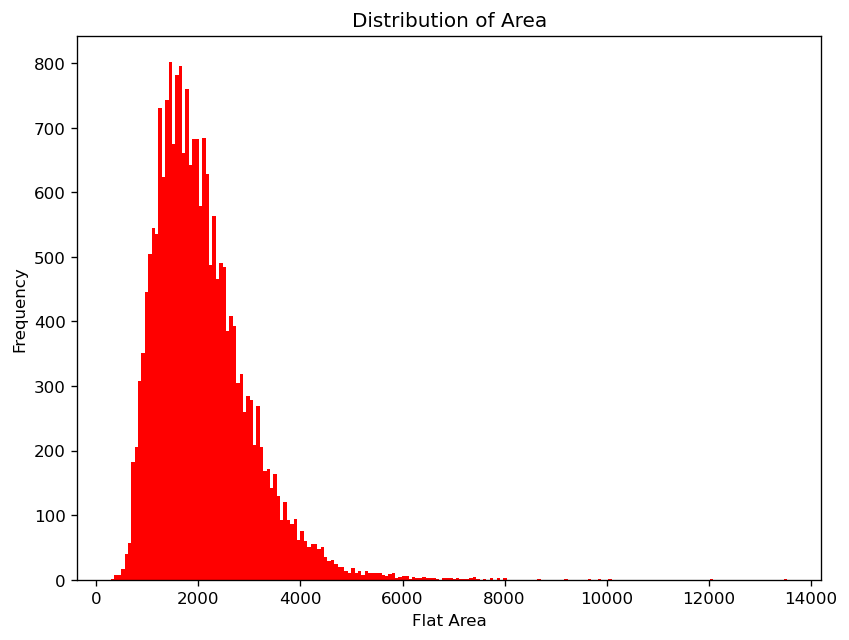

In [14]:
plt.figure(dpi=120,figsize=(8,6))

plt.hist(data['Flat Area (in Sqft)'],bins=200,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()

Here we observe plot is in right skew in nature

In [10]:
def log_transform(sample_data):
    return np.log(sample_data)

In [11]:
data['Transform_Flat_Area']=data['Flat Area (in Sqft)'].map(log_transform)

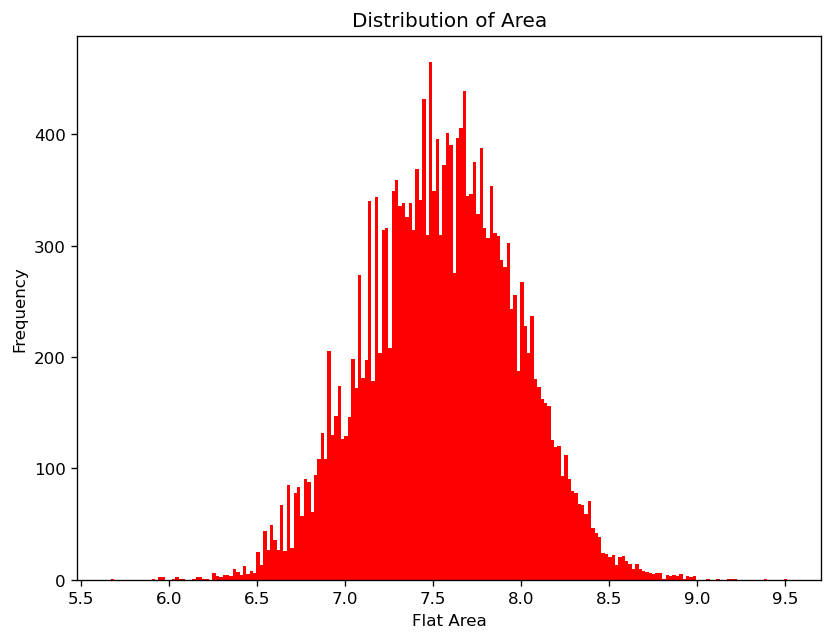

In [21]:
plt.figure(figsize=(8,6),dpi=120)

plt.hist(data['Transform_Flat_Area'],bins=200,color='red')
plt.xlabel("Flat Area")
plt.ylabel("Frequency")
plt.title("Distribution of Area")
plt.show()